<a href="https://colab.research.google.com/github/hiprasasti/Hotel-Booking-Analysis/blob/main/230823_Resort_Hotel%2C_Portugal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Additional Information**

*   ADR [Numeric]: Average Daily Rate as defined
*   Adults [Integer]: Number of adults
*   Agent [Categorical]: ID of the travel agency that made the booking
*   Arrival Date Day Of Month [Integer]:Day of the month of the arrival date
*   Arrival Date Month [Categorical]: Month of arrival date with 12 categories: “January” to “December”
*   Arrival Date Week Number [Integer]: Week number of the arrival date
*   Arrival Date Year [Integer]: Year of arrival date
*   Assigned Room Type [Categorical]: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.
*   Babies [Integer]: Number of babies
*   Booking Changes [Integer]: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.
*   Children [Integer]: Number of children
*   Company [Integer]: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons.
*   Country [Categorical]: Country of origin. Categories are represented in the ISO 3155–3:2013 format.
*   Customer Type [Categorical]: Type of booking, assuming one of four categories, Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking.
*   Days I nWaiting List [Integer]: Number of days the booking was in the waiting list before it was confirmed to the customer.
*   Deposit Type [Categorical]: Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:No Deposit – no deposit was made, in case no payments were found the value is “No Deposit”; If the payment was equal or exceeded the total cost of stay, the value is set as “Non Refund”, Non Refund – a deposit was made in the value of the total stay cost; Otherwise the value is set as “Refundable”, Refundable – a deposit was made with a value under the total cost of stay.
*   Distribution Channel [Categorical]: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”.
*   Is Canceled [Categorical]: Value indicating if the booking was canceled (1) or not (0).
*   Is Repeated Guest [Categorical]: Value indicating if the booking name was from a repeated guest (1) or not (0).
*   Lead Time [Integer]: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.
*   Market Segment [Categorical]: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”.
*   Meal [Categorical]: Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner).
*   Previous Bookings Not Canceled [Integer]: Number of previous bookings not cancelled by the customer prior to the current booking.
*   Previous Cancellations [Integer]: Number of previous bookings that were cancelled by the customer prior to the current booking.
*   Required Card Parking Spaces [Integer]: Number of car parking spaces required by the customer.
*   Reservation Status [Categorical]: Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why.
*   Reservation Status Date [Date]: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel.
*   Reserved Room Type [Categorical]: Code of room type reserved. Code is presented instead of designation for anonymity reasons.
*   Stays In Weekend Nights [Integer]: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel.
*   Stays In Week Nights [Integer]: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel.
*   Total Of Special Requests [Integer]: Number of special requests made by the customer (e.g. twin bed or high floor).


# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn import cluster
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import classification_report, confusion_matrix

# **Import Dataset**

**Resort Hotel, Portugal**

In [ ]:
RH_Portugal_url = 'https://docs.google.com/spreadsheets/d/1ZFd7GG3E-XQyHwHd897WR8-37LQtB_5U/edit#gid=1583984830'
RH_Portugal = RH_Portugal_url.replace('/edit#gid=', '/export?format=csv&gid=')
ResortHotel = pd.read_csv(RH_Portugal)
ResortHotel

,hotel,is_canceled,lead_time,arrival_date,arrival_date_day,arrival_month,arrival_year,arrival_month_year,arrival_date_week_number,stays_in_weekend_nights,...,agent,is_use_agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,1-Jul-2015,1,July,2015,July-2015,27,0,...,0,0,0,0,Transient,0,0,0,Check-Out,1-Jul-2015
1,Resort Hotel,0,737,1-Jul-2015,1,July,2015,July-2015,27,0,...,0,0,0,0,Transient,0,0,0,Check-Out,1-Jul-2015
2,Resort Hotel,0,7,1-Jul-2015,1,July,2015,July-2015,27,0,...,0,0,0,0,Transient,75,0,0,Check-Out,2-Jul-2015
3,Resort Hotel,0,13,1-Jul-2015,1,July,2015,July-2015,27,0,...,304,1,0,0,Transient,75,0,0,Check-Out,2-Jul-2015
4,Resort Hotel,0,14,1-Jul-2015,1,July,2015,July-2015,27,0,...,240,1,0,0,Transient,98,0,1,Check-Out,3-Jul-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39588,Resort Hotel,0,212,31-Aug-2017,31,August,2017,August-2017,35,2,...,143,1,0,0,Transient,8975,0,0,Check-Out,10-Sep-2017
39589,Resort Hotel,0,169,30-Aug-2017,30,August,2017,August-2017,35,2,...,250,1,0,0,Transient-Party,20227,0,1,Check-Out,10-Sep-2017
39590,Resort Hotel,0,204,29-Aug-2017,29,August,2017,August-2017,35,4,...,250,1,0,0,Transient,15357,0,3,Check-Out,12-Sep-2017
39591,Resort Hotel,0,211,31-Aug-2017,31,August,2017,August-2017,35,4,...,40,1,0,0,Contract,1128,0,1,Check-Out,14-Sep-2017


In [ ]:
ResortHotel.shape

(39593, 39)

# **Cleaning Process**

**Data Info**

In [ ]:
ResortHotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39593 entries, 0 to 39592
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   hotel                           39593 non-null  object
 1   is_canceled                     39593 non-null  int64 
 2   lead_time                       39593 non-null  int64 
 3   arrival_date                    39593 non-null  object
 4   arrival_date_day                39593 non-null  int64 
 5   arrival_month                   39593 non-null  object
 6   arrival_year                    39593 non-null  int64 
 7   arrival_month_year              39593 non-null  object
 8   arrival_date_week_number        39593 non-null  int64 
 9   stays_in_weekend_nights         39593 non-null  int64 
 10  stays_in_week_nights            39593 non-null  int64 
 11  length_of_stay                  39593 non-null  int64 
 12  adults                          39593 non-null

**Missing Value**

In [ ]:
ResortHotel.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date                      0
arrival_date_day                  0
arrival_month                     0
arrival_year                      0
arrival_month_year                0
arrival_date_week_number          0
stays_in_weekend_nights           0
stays_in_week_nights              0
length_of_stay                    0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
continent                         0
subregion                         0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
is_room_change                    0
booking_changes             

**String Manipulation**

In [ ]:
ResortHotel['is_repeated_guest'] = ResortHotel['is_repeated_guest'].astype(str)

In [ ]:
ResortHotel['is_room_change'] = ResortHotel['is_room_change'].astype(str)

In [ ]:
ResortHotel['is_use_agent'] = ResortHotel['is_use_agent'].astype(str)

**Date Manipulation**

In [ ]:
ResortHotel['arrival_date'] = ResortHotel['arrival_date'].apply(pd.to_datetime)

In [ ]:
ResortHotel['reservation_status_date'] = ResortHotel['reservation_status_date'].apply(pd.to_datetime)

**Filtering Row**

Dropped rows with 0 zero in adults, children, and babies at the same time.

In [ ]:
filter = (ResortHotel.children == 0) & (ResortHotel.adults ==0) & (ResortHotel.babies == 0)
ResortHotel[filter]

,hotel,is_canceled,lead_time,arrival_date,arrival_date_day,arrival_month,arrival_year,arrival_month_year,arrival_date_week_number,stays_in_weekend_nights,...,agent,is_use_agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2223,Resort Hotel,0,1,2015-10-06,6,October,2015,October-2015,41,0,...,0,0,174,0,Transient-Party,0,0,0,Check-Out,2015-10-06
2408,Resort Hotel,0,0,2015-10-12,12,October,2015,October-2015,42,0,...,0,0,174,0,Transient,0,0,0,Check-Out,2015-10-12
3180,Resort Hotel,0,36,2015-11-20,20,November,2015,November-2015,47,1,...,38,1,0,0,Transient-Party,0,0,0,Check-Out,2015-11-23
3683,Resort Hotel,0,165,2015-12-30,30,December,2015,December-2015,53,1,...,308,1,0,122,Transient-Party,0,0,0,Check-Out,2016-01-04
3707,Resort Hotel,0,165,2015-12-30,30,December,2015,December-2015,53,2,...,308,1,0,122,Transient-Party,0,0,0,Check-Out,2016-01-05
31299,Resort Hotel,0,31,2016-12-27,27,December,2016,December-2016,53,2,...,0,0,0,0,Transient,28,1,0,Check-Out,2017-01-06
31563,Resort Hotel,0,4,2017-01-14,14,January,2017,January-2017,2,0,...,168,1,0,0,Transient-Party,0,0,0,Check-Out,2017-01-15
32361,Resort Hotel,0,46,2017-01-25,25,January,2017,January-2017,4,3,...,0,0,0,0,Transient,0,0,0,Check-Out,2017-02-06
34382,Resort Hotel,0,15,2017-03-30,30,March,2017,March-2017,13,2,...,0,0,523,0,Transient-Party,0,0,0,Check-Out,2017-04-07
34388,Resort Hotel,0,15,2017-03-30,30,March,2017,March-2017,13,2,...,0,0,523,0,Transient-Party,0,0,0,Check-Out,2017-04-07


In [ ]:
ResortHotel = ResortHotel[~((ResortHotel['adults']==0) & (ResortHotel['children']==0) & (ResortHotel['babies']==0))]
ResortHotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39582 entries, 0 to 39592
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           39582 non-null  object        
 1   is_canceled                     39582 non-null  int64         
 2   lead_time                       39582 non-null  int64         
 3   arrival_date                    39582 non-null  datetime64[ns]
 4   arrival_date_day                39582 non-null  int64         
 5   arrival_month                   39582 non-null  object        
 6   arrival_year                    39582 non-null  int64         
 7   arrival_month_year              39582 non-null  object        
 8   arrival_date_week_number        39582 non-null  int64         
 9   stays_in_weekend_nights         39582 non-null  int64         
 10  stays_in_week_nights            39582 non-null  int64         
 11  le

# **Checking Typo and Counts**

## **Variable and Counts**

In [ ]:
for col in ResortHotel.columns:
  print(ResortHotel[col].value_counts())

Resort Hotel    39582
Name: hotel, dtype: int64
0    28505
1    11077
Name: is_canceled, dtype: int64
0      3121
1      1529
2       904
3       780
4       644
       ... 
434       1
424       1
709       1
737       1
398       1
Name: lead_time, Length: 412, dtype: int64
2015-12-05    222
2016-02-12    175
2016-03-24    170
2016-02-26    153
2015-09-17    152
             ... 
2015-11-14     11
2015-12-13     10
2015-10-17      9
2016-01-24      7
2015-11-29      5
Name: arrival_date, Length: 793, dtype: int64
12    1566
30    1449
5     1437
16    1406
9     1390
26    1389
17    1379
2     1370
18    1361
24    1357
25    1320
3     1304
15    1301
19    1294
4     1286
1     1277
11    1263
22    1257
28    1257
27    1249
8     1232
29    1201
14    1198
7     1198
21    1187
20    1183
6     1174
10    1168
23    1162
13    1120
31     847
Name: arrival_date_day, dtype: int64
August       4873
July         4539
April        3569
May          3547
October      3502
March      

# **Checking Outliers**

In [ ]:
RH = ResortHotel.copy()

In [ ]:
RH.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39582 entries, 0 to 39592
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           39582 non-null  object        
 1   is_canceled                     39582 non-null  int64         
 2   lead_time                       39582 non-null  int64         
 3   arrival_date                    39582 non-null  datetime64[ns]
 4   arrival_date_day                39582 non-null  int64         
 5   arrival_month                   39582 non-null  object        
 6   arrival_year                    39582 non-null  int64         
 7   arrival_month_year              39582 non-null  object        
 8   arrival_date_week_number        39582 non-null  int64         
 9   stays_in_weekend_nights         39582 non-null  int64         
 10  stays_in_week_nights            39582 non-null  int64         
 11  le

In [ ]:
RH.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,39582.0,0.279849,0.448931,0.0,0.0,0.0,1.0,1.0
lead_time,39582.0,93.451139,97.394352,0.0,11.0,59.0,155.0,737.0
arrival_date_day,39582.0,15.825704,8.881147,1.0,8.0,16.0,24.0,31.0
arrival_year,39582.0,2016.123895,0.722760,2015.0,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,39582.0,27.152089,13.965110,1.0,16.0,28.0,38.0,53.0
stays_in_weekend_nights,39582.0,1.196276,1.142022,0.0,0.0,1.0,2.0,16.0
stays_in_week_nights,39582.0,3.141150,2.445869,0.0,1.0,3.0,5.0,40.0
length_of_stay,39582.0,4.337426,3.356613,0.0,2.0,4.0,7.0,56.0
adults,39582.0,1.873453,0.696534,1.0,2.0,2.0,2.0,55.0
children,39582.0,0.129882,0.447244,0.0,0.0,0.0,0.0,10.0


**lead_time**

In [ ]:
# Calculate quartile 1 and 3
Q1 = RH['lead_time'].quantile(0.25)
Q3 = RH['lead_time'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 11.0

Q3:
 155.0

IQR:
 144.0

Min:
 -205.0

Max:
 371.0


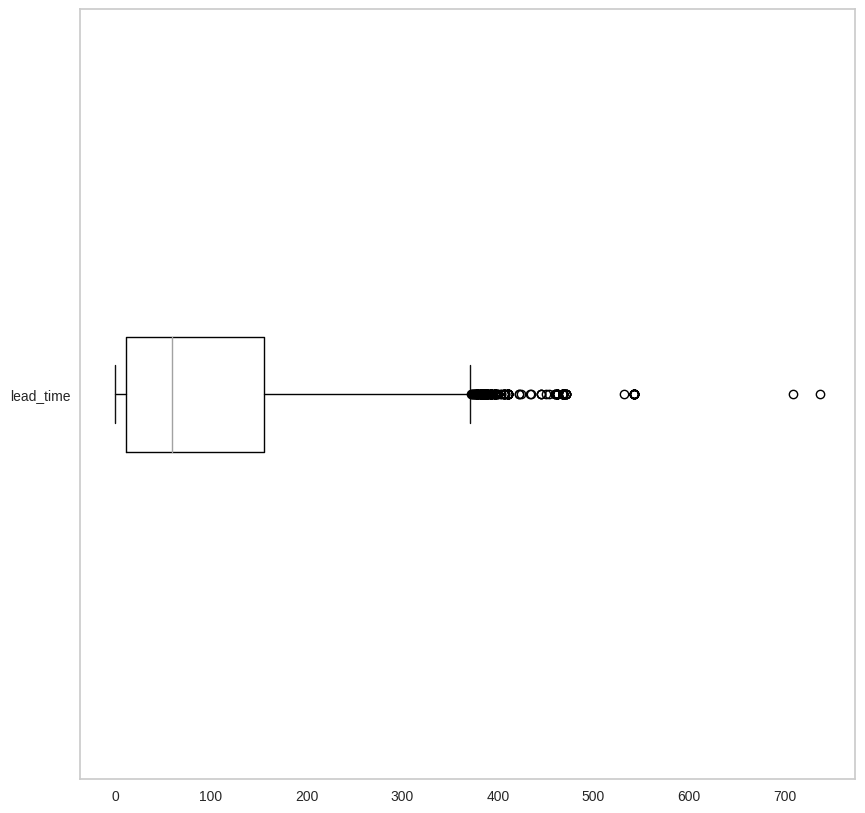

In [ ]:
RH.boxplot(column=['lead_time'],fontsize=10,
           rot=0,grid=False,figsize=(10,10),vert=False)
plt.show()

**length_of_stay**

In [ ]:
# Calculate quartile 1 and 3
Q1 = RH['length_of_stay'].quantile(0.25)
Q3 = RH['length_of_stay'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 2.0

Q3:
 7.0

IQR:
 5.0

Min:
 -5.5

Max:
 14.5


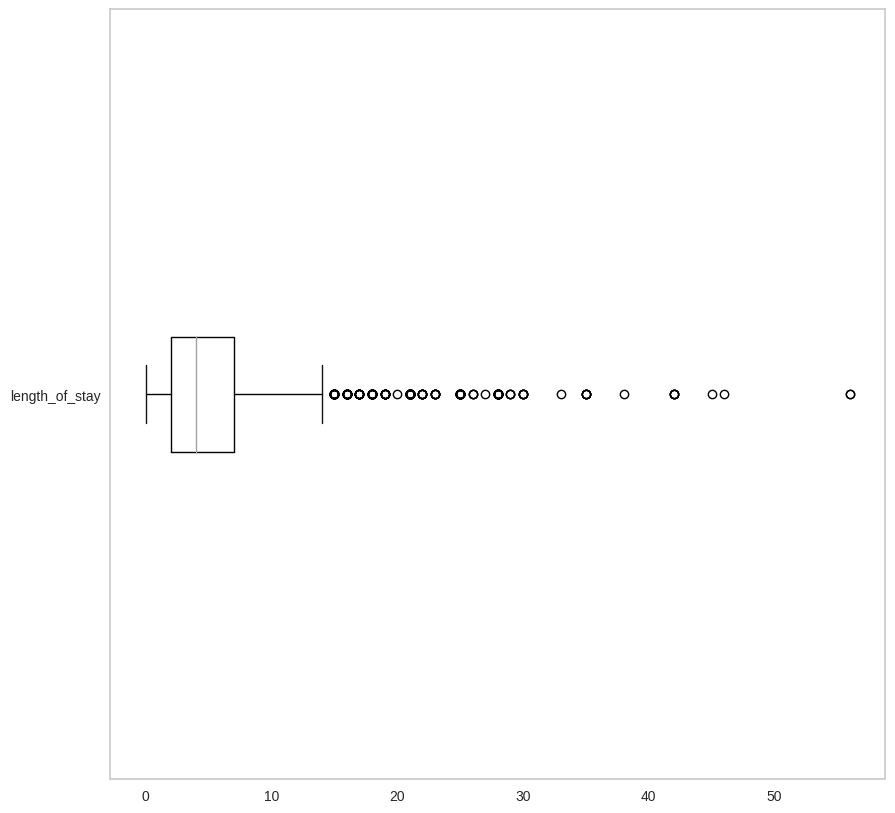

In [ ]:
RH.boxplot(column=['length_of_stay'],fontsize=10,
           rot=0,grid=False,figsize=(10,10),vert=False)
plt.show()

**adults**

In [ ]:
# Calculate quartile 1 and 3
Q1 = RH['adults'].quantile(0.25)
Q3 = RH['adults'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 2.0

Q3:
 2.0

IQR:
 0.0

Min:
 2.0

Max:
 2.0


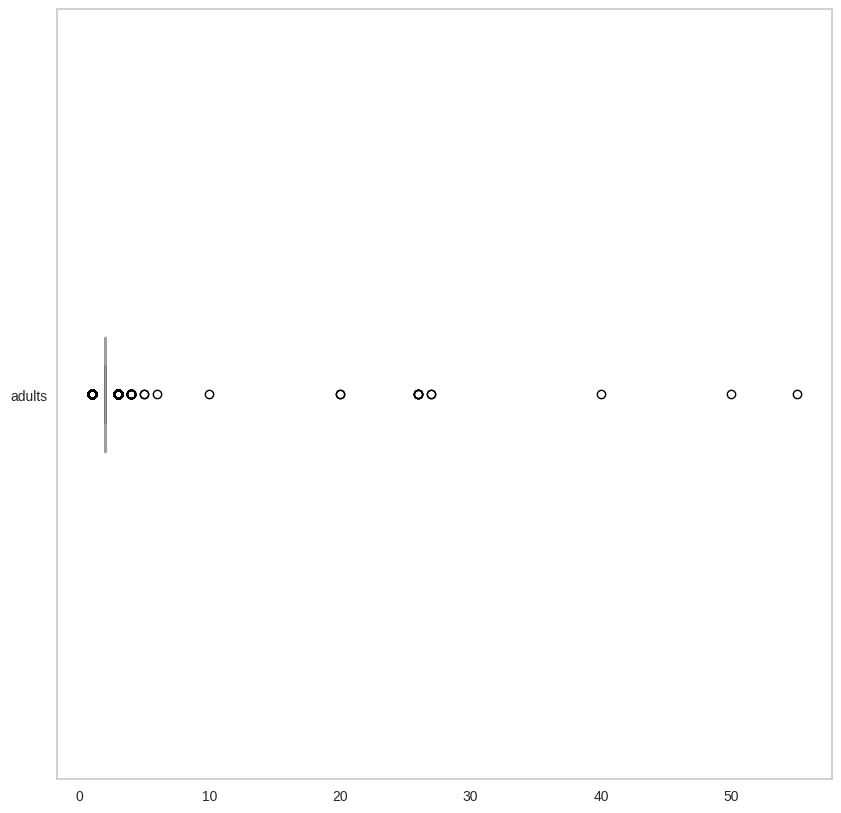

In [ ]:
RH.boxplot(column=['adults'],fontsize=10,
           rot=0,grid=False,figsize=(10,10),vert=False)
plt.show()

**previous_cancellations**

In [ ]:
# Calculate quartile 1 and 3
Q1 = RH['previous_cancellations'].quantile(0.25)
Q3 = RH['previous_cancellations'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 0.0

Q3:
 0.0

IQR:
 0.0

Min:
 0.0

Max:
 0.0


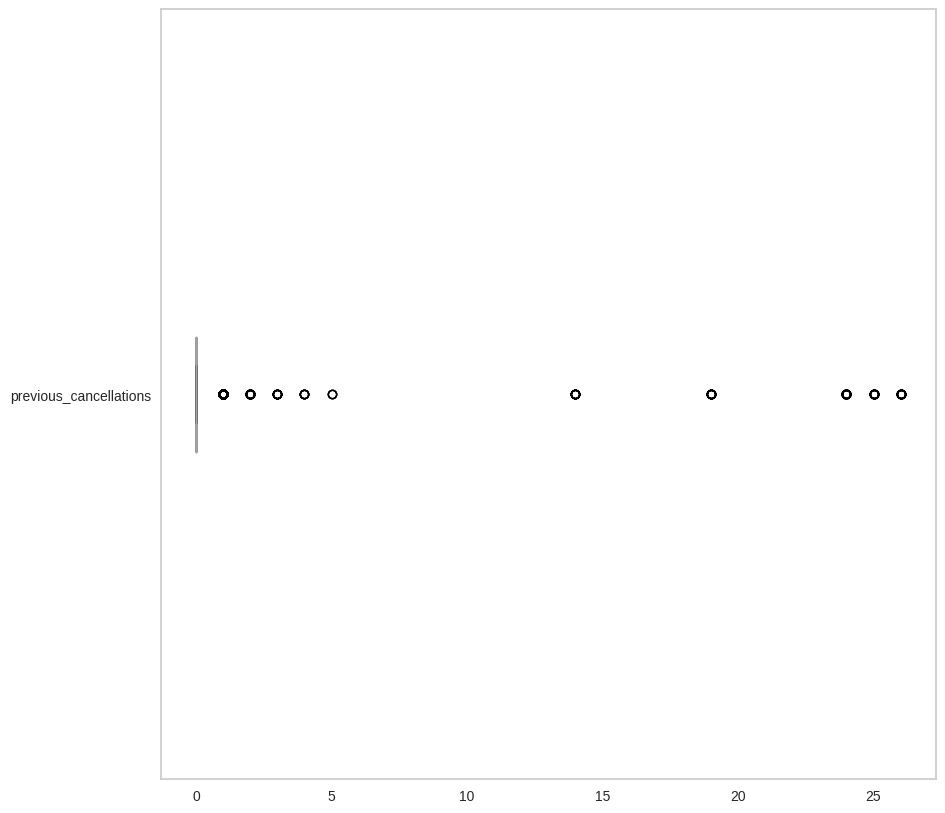

In [ ]:
RH.boxplot(column=['previous_cancellations'],fontsize=10,
           rot=0,grid=False,figsize=(10,10),vert=False)
plt.show()

**booking_changes**

In [ ]:
# Calculate quartile 1 and 3
Q1 = RH['booking_changes'].quantile(0.25)
Q3 = RH['booking_changes'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 0.0

Q3:
 0.0

IQR:
 0.0

Min:
 0.0

Max:
 0.0


**days_in_waiting_list**

In [ ]:
# Calculate quartile 1 and 3
Q1 = RH['days_in_waiting_list'].quantile(0.25)
Q3 = RH['days_in_waiting_list'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 0.0

Q3:
 0.0

IQR:
 0.0

Min:
 0.0

Max:
 0.0


**adr**

In [ ]:
# Calculate quartile 1 and 3
Q1 = RH['adr'].quantile(0.25)
Q3 = RH['adr'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 65.0

Q3:
 1174.5

IQR:
 1109.5

Min:
 -1599.25

Max:
 2838.75


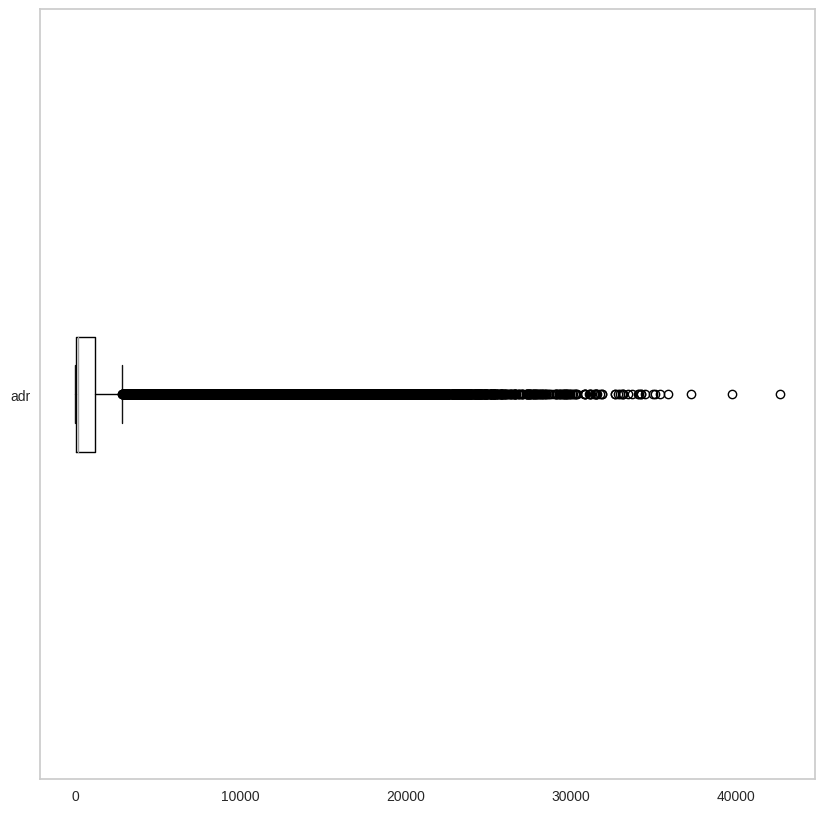

In [ ]:
RH.boxplot(column=['adr'],fontsize=10,
           rot=0,grid=False,figsize=(10,10),vert=False)
plt.show()

**required_car_parking_space**

In [ ]:
# Calculate quartile 1 and 3
Q1 = RH['required_car_parking_spaces'].quantile(0.25)
Q3 = RH['required_car_parking_spaces'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 0.0

Q3:
 0.0

IQR:
 0.0

Min:
 0.0

Max:
 0.0


**total_of_special_request**

In [ ]:
# Calculate quartile 1 and 3
Q1 = RH['total_of_special_requests'].quantile(0.25)
Q3 = RH['total_of_special_requests'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 0.0

Q3:
 1.0

IQR:
 1.0

Min:
 -1.5

Max:
 2.5


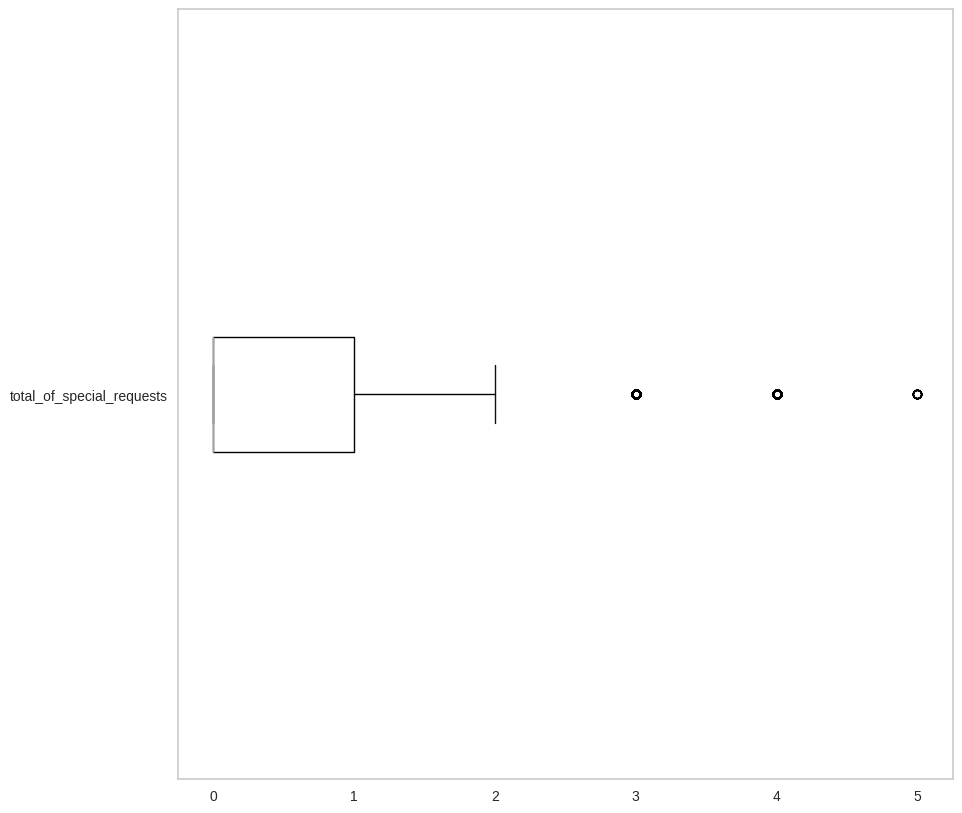

In [ ]:
RH.boxplot(column=['total_of_special_requests'],fontsize=10,
           rot=0,grid=False,figsize=(10,10),vert=False)
plt.show()

# **Exploratory Data Analysis**

**Percentage Cancellation**

In [ ]:
is_can= len(RH[RH['is_canceled']==1])
print("Percentage cancellation= ", is_can/len(RH))
RH['reservation_status'].value_counts(normalize=True)*100

Percentage cancellation=  0.2798494265069981


Check-Out    72.015057
Canceled     27.259866
No-Show       0.725077
Name: reservation_status, dtype: float64

**Number of Guest**

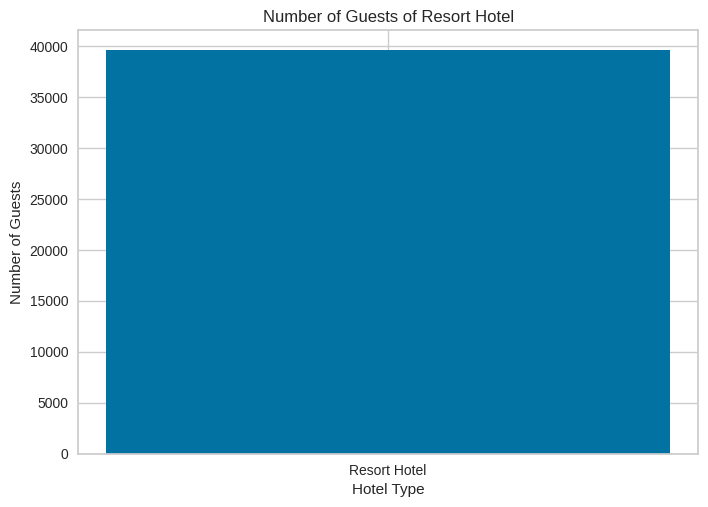

In [ ]:
resort_len= len(RH[RH['hotel']=='Resort Hotel'])

hotel_types= ['Resort Hotel']
lengths= [resort_len]

plt.bar(hotel_types, lengths)
plt.xlabel('Hotel Type')
plt.ylabel('Number of Guests')
plt.title('Number of Guests of Resort Hotel')
plt.show()

**Country Wise**

In [ ]:
country_wise_counts= RH[RH['is_canceled']==0]['country'].value_counts().reset_index()
country_wise_counts.columns= ['country', 'No of guests']
country_wise_counts

,country,No of guests
0,PRT,10183
1,GBR,5921
2,ESP,3105
3,IRL,1734
4,FRA,1399
...,...,...
113,CIV,1
114,SAU,1
115,SMR,1
116,BDI,1


In [ ]:
import folium
from folium.plugins import HeatMap
import plotly.express as px

In [ ]:
basemap= folium.map
guests_map= px.choropleth(country_wise_counts, locations= country_wise_counts['country'],
                        color= country_wise_counts['No of guests'],
                         hover_name= country_wise_counts['country'])

guests_map.show()

Most guests are from Portugal, UK, Spain, Ireland, French, and Germany.

**Average Price per Room**

In [ ]:
dfRH= RH[RH['is_canceled']==0]
px.box(data_frame= dfRH, x='reserved_room_type', y='adr', color='hotel', template='plotly_dark')


**Average ADR per Month**

In [ ]:
data_resort= RH[(RH['hotel']=='Resort Hotel')&(RH['is_canceled']==0)]


In [ ]:
resort_hotel= data_resort.groupby(['arrival_month'])['adr'].mean().reset_index()
resort_hotel

,arrival_month,adr
0,April,1911.034948
1,August,5521.937288
2,December,2080.031472
3,February,790.003107
4,January,571.534216
5,July,4665.041171
6,June,2581.171767
7,March,930.535189
8,May,1795.338882
9,November,836.831699


**ADR per Month Order**

In [ ]:
month_order= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
resort_hotel['arrival_month']= pd.Categorical(resort_hotel['arrival_month'],categories=month_order, ordered=True)
final_prices= resort_hotel.sort_values(by='arrival_month')
print(final_prices)

   arrival_month          adr
4        January   571.534216
3       February   790.003107
7          March   930.535189
0          April  1911.034948
8            May  1795.338882
6           June  2581.171767
5           July  4665.041171
1         August  5521.937288
11     September  2512.398652
10       October  1450.879351
9       November   836.831699
2       December  2080.031472


**Room Price per Night Over the Months**

In [ ]:
import pandas as pd
import plotly.express as px

In [ ]:
plt.figure(figsize=(19, 10))

fig = px.line(final_prices, x='arrival_month', y='adr',
              title='Room Price per Night Over the Months',
              template='plotly_dark')

fig.show()

<Figure size 1900x1000 with 0 Axes>

Resort Hotel- expensive in August, July, June, September, and December.

**Length of Stay**

In [ ]:
filter= RH['is_canceled']==0
RH_EDA=RH[filter]
RH_EDA

,hotel,is_canceled,lead_time,arrival_date,arrival_date_day,arrival_month,arrival_year,arrival_month_year,arrival_date_week_number,stays_in_weekend_nights,...,agent,is_use_agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015-07-01,1,July,2015,July-2015,27,0,...,0,0,0,0,Transient,0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015-07-01,1,July,2015,July-2015,27,0,...,0,0,0,0,Transient,0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015-07-01,1,July,2015,July-2015,27,0,...,0,0,0,0,Transient,75,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015-07-01,1,July,2015,July-2015,27,0,...,304,1,0,0,Transient,75,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015-07-01,1,July,2015,July-2015,27,0,...,240,1,0,0,Transient,98,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39588,Resort Hotel,0,212,2017-08-31,31,August,2017,August-2017,35,2,...,143,1,0,0,Transient,8975,0,0,Check-Out,2017-09-10
39589,Resort Hotel,0,169,2017-08-30,30,August,2017,August-2017,35,2,...,250,1,0,0,Transient-Party,20227,0,1,Check-Out,2017-09-10
39590,Resort Hotel,0,204,2017-08-29,29,August,2017,August-2017,35,4,...,250,1,0,0,Transient,15357,0,3,Check-Out,2017-09-12
39591,Resort Hotel,0,211,2017-08-31,31,August,2017,August-2017,35,4,...,40,1,0,0,Contract,1128,0,1,Check-Out,2017-09-14


In [ ]:
RH_EDA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28505 entries, 0 to 39592
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           28505 non-null  object        
 1   is_canceled                     28505 non-null  int64         
 2   lead_time                       28505 non-null  int64         
 3   arrival_date                    28505 non-null  datetime64[ns]
 4   arrival_date_day                28505 non-null  int64         
 5   arrival_month                   28505 non-null  object        
 6   arrival_year                    28505 non-null  int64         
 7   arrival_month_year              28505 non-null  object        
 8   arrival_date_week_number        28505 non-null  int64         
 9   stays_in_weekend_nights         28505 non-null  int64         
 10  stays_in_week_nights            28505 non-null  int64         
 11  le

In [ ]:
stay= RH_EDA.groupby(['length_of_stay', 'hotel']).agg('count').reset_index()
stay= stay.iloc[:,:3]
stay= stay.rename(columns={'is_canceled': "Number of stays"})
stay

,length_of_stay,hotel,Number of stays
0,0,Resort Hotel,366
1,1,Resort Hotel,6368
2,2,Resort Hotel,4381
3,3,Resort Hotel,3794
4,4,Resort Hotel,3303
5,5,Resort Hotel,1887
6,6,Resort Hotel,1198
7,7,Resort Hotel,4426
8,8,Resort Hotel,505
9,9,Resort Hotel,405


In [ ]:
px.bar(data_frame= stay, x='length_of_stay', y='Number of stays',
       color= 'hotel', barmode='group', template='plotly_dark')

**Weekend Stays by Market Segment**

<Axes: xlabel='market_segment', ylabel='stays_in_weekend_nights'>

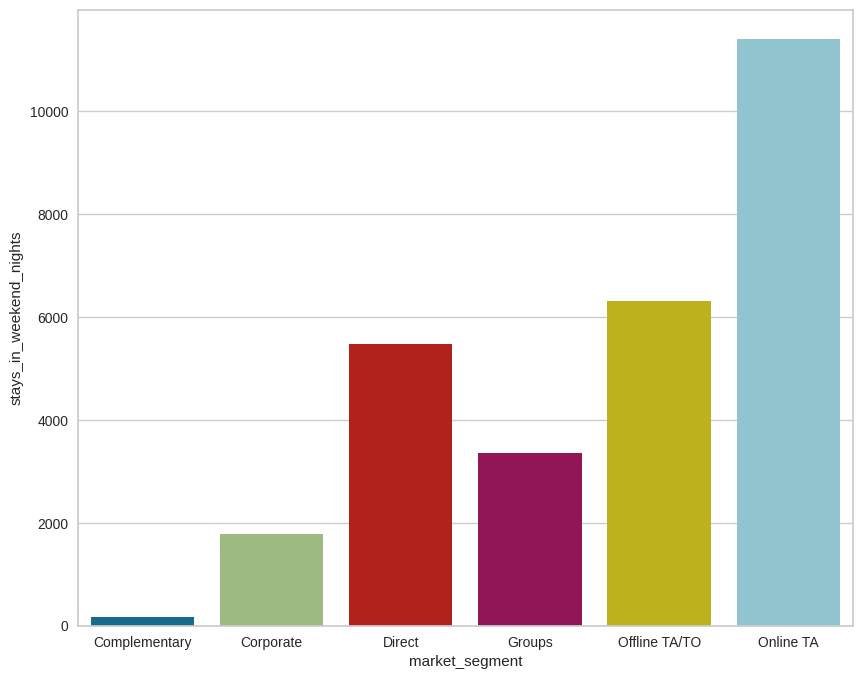

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=RH[RH['is_canceled']==0].groupby('market_segment')['stays_in_weekend_nights'].count().index,
            y= RH[RH['is_canceled']==0].groupby('market_segment')['stays_in_weekend_nights'].count())

**Weekday Stay by Markert Segment**

<Axes: xlabel='market_segment', ylabel='stays_in_week_nights'>

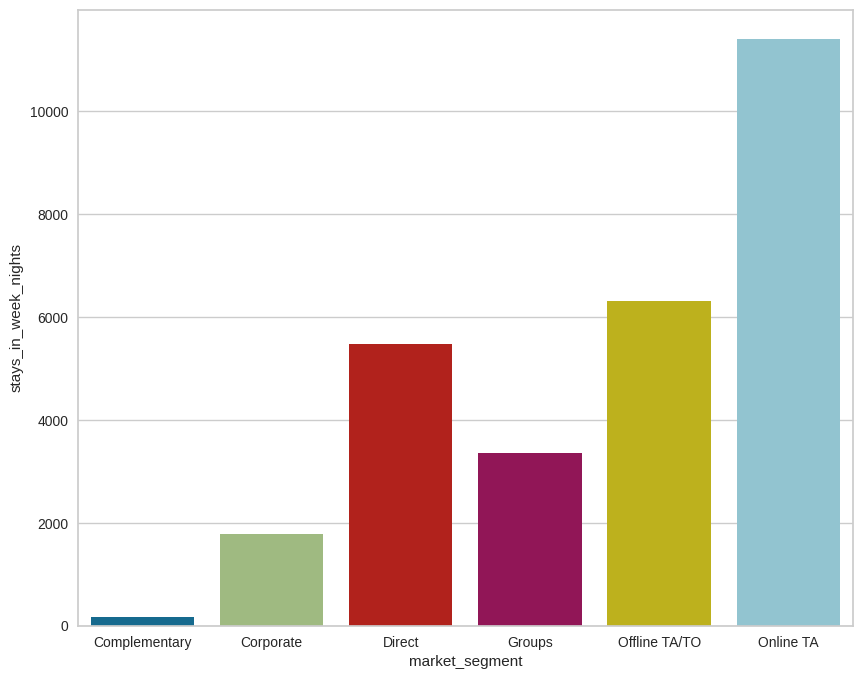

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=RH[RH['is_canceled']==0].groupby('market_segment')['stays_in_week_nights'].count().index,
            y= RH[RH['is_canceled']==0].groupby('market_segment')['stays_in_week_nights'].count())

# **Correlation Analysis**

In [ ]:
Resort_CA = RH.copy()

In [ ]:
Resort_dropdup= Resort_CA.drop_duplicates()
len(Resort_dropdup)

33509

In [ ]:
Resort_dropdup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33509 entries, 0 to 39592
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           33509 non-null  object        
 1   is_canceled                     33509 non-null  int64         
 2   lead_time                       33509 non-null  int64         
 3   arrival_date                    33509 non-null  datetime64[ns]
 4   arrival_date_day                33509 non-null  int64         
 5   arrival_month                   33509 non-null  object        
 6   arrival_year                    33509 non-null  int64         
 7   arrival_month_year              33509 non-null  object        
 8   arrival_date_week_number        33509 non-null  int64         
 9   stays_in_weekend_nights         33509 non-null  int64         
 10  stays_in_week_nights            33509 non-null  int64         
 11  le

In [ ]:
Resort_CAdrop = Resort_dropdup.drop(['reservation_status_date', 'reserved_room_type', 'assigned_room_type', 'arrival_date_day', 'arrival_date'], axis=1)

In [ ]:
Resort_CAdrop

,hotel,is_canceled,lead_time,arrival_month,arrival_year,arrival_month_year,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,length_of_stay,...,deposit_type,agent,is_use_agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,July,2015,July-2015,27,0,0,0,...,No Deposit,0,0,0,0,Transient,0,0,0,Check-Out
1,Resort Hotel,0,737,July,2015,July-2015,27,0,0,0,...,No Deposit,0,0,0,0,Transient,0,0,0,Check-Out
2,Resort Hotel,0,7,July,2015,July-2015,27,0,1,1,...,No Deposit,0,0,0,0,Transient,75,0,0,Check-Out
3,Resort Hotel,0,13,July,2015,July-2015,27,0,1,1,...,No Deposit,304,1,0,0,Transient,75,0,0,Check-Out
4,Resort Hotel,0,14,July,2015,July-2015,27,0,2,2,...,No Deposit,240,1,0,0,Transient,98,0,1,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39588,Resort Hotel,0,212,August,2017,August-2017,35,2,8,10,...,No Deposit,143,1,0,0,Transient,8975,0,0,Check-Out
39589,Resort Hotel,0,169,August,2017,August-2017,35,2,9,11,...,No Deposit,250,1,0,0,Transient-Party,20227,0,1,Check-Out
39590,Resort Hotel,0,204,August,2017,August-2017,35,4,10,14,...,No Deposit,250,1,0,0,Transient,15357,0,3,Check-Out
39591,Resort Hotel,0,211,August,2017,August-2017,35,4,10,14,...,No Deposit,40,1,0,0,Contract,1128,0,1,Check-Out


In [ ]:
#correlation_matrix = data.corr()
correlation_matrix = Resort_CAdrop.corr(method='pearson')
correlation_matrix

<ipython-input-54-98406e82b1bd>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,is_canceled,lead_time,arrival_year,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,length_of_stay,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.181753,0.082427,0.022252,0.087098,0.096172,0.099376,0.078186,0.121682,-0.013835,0.067995,-0.069436,-0.089375,0.162395,-0.077323,-0.019570,0.030432,-0.238600,-0.052572
lead_time,0.181753,1.000000,0.099136,0.117291,0.387568,0.448033,0.456791,0.139976,0.027365,0.013517,0.031977,-0.102010,0.104605,0.096949,-0.064901,0.085542,0.169656,-0.133251,0.054314
arrival_year,0.082427,0.099136,1.000000,-0.517694,0.011146,-0.000538,0.003389,-0.024949,0.052592,-0.021653,-0.045268,0.065738,0.026314,0.080656,0.022893,-0.002029,0.033518,-0.023086,0.054192
arrival_date_week_number,0.022252,0.117291,-0.517694,1.000000,0.052396,0.058162,0.060005,0.054764,0.017203,0.017960,0.016667,-0.059884,0.011208,0.014946,-0.030243,0.024259,0.104120,0.006986,0.045918
stays_in_weekend_nights,0.087098,0.387568,0.011146,0.052396,1.000000,0.726119,0.866417,0.095354,0.032035,0.012691,-0.008481,-0.101055,0.055110,0.098339,-0.130208,-0.000047,0.236803,-0.106958,0.051481
stays_in_week_nights,0.096172,0.448033,-0.000538,0.058162,0.726119,1.000000,0.972439,0.096271,0.029249,0.012310,-0.003718,-0.095625,0.080974,0.084543,-0.097755,0.021746,0.254219,-0.119862,0.046961
length_of_stay,0.099376,0.456791,0.003389,0.060005,0.866417,0.972439,1.000000,0.102248,0.032104,0.013243,-0.005576,-0.103712,0.077492,0.094743,-0.115145,0.015776,0.264917,-0.123315,0.051561
adults,0.078186,0.139976,-0.024949,0.054764,0.095354,0.096271,0.102248,1.000000,0.069300,0.021252,-0.017419,-0.131564,-0.004397,0.087918,-0.145516,-0.013398,0.097678,0.010751,0.071036
children,0.121682,0.027365,0.052592,0.017203,0.032035,0.029249,0.032104,0.069300,1.000000,0.015456,-0.010816,-0.041376,0.034643,0.094756,-0.059318,-0.017188,0.136509,0.031474,0.006871
babies,-0.013835,0.013517,-0.021653,0.017960,0.012691,0.012310,0.013243,0.021252,0.015456,1.000000,-0.006208,-0.018993,0.098108,0.003270,-0.016974,-0.005846,0.015193,0.028037,0.130522


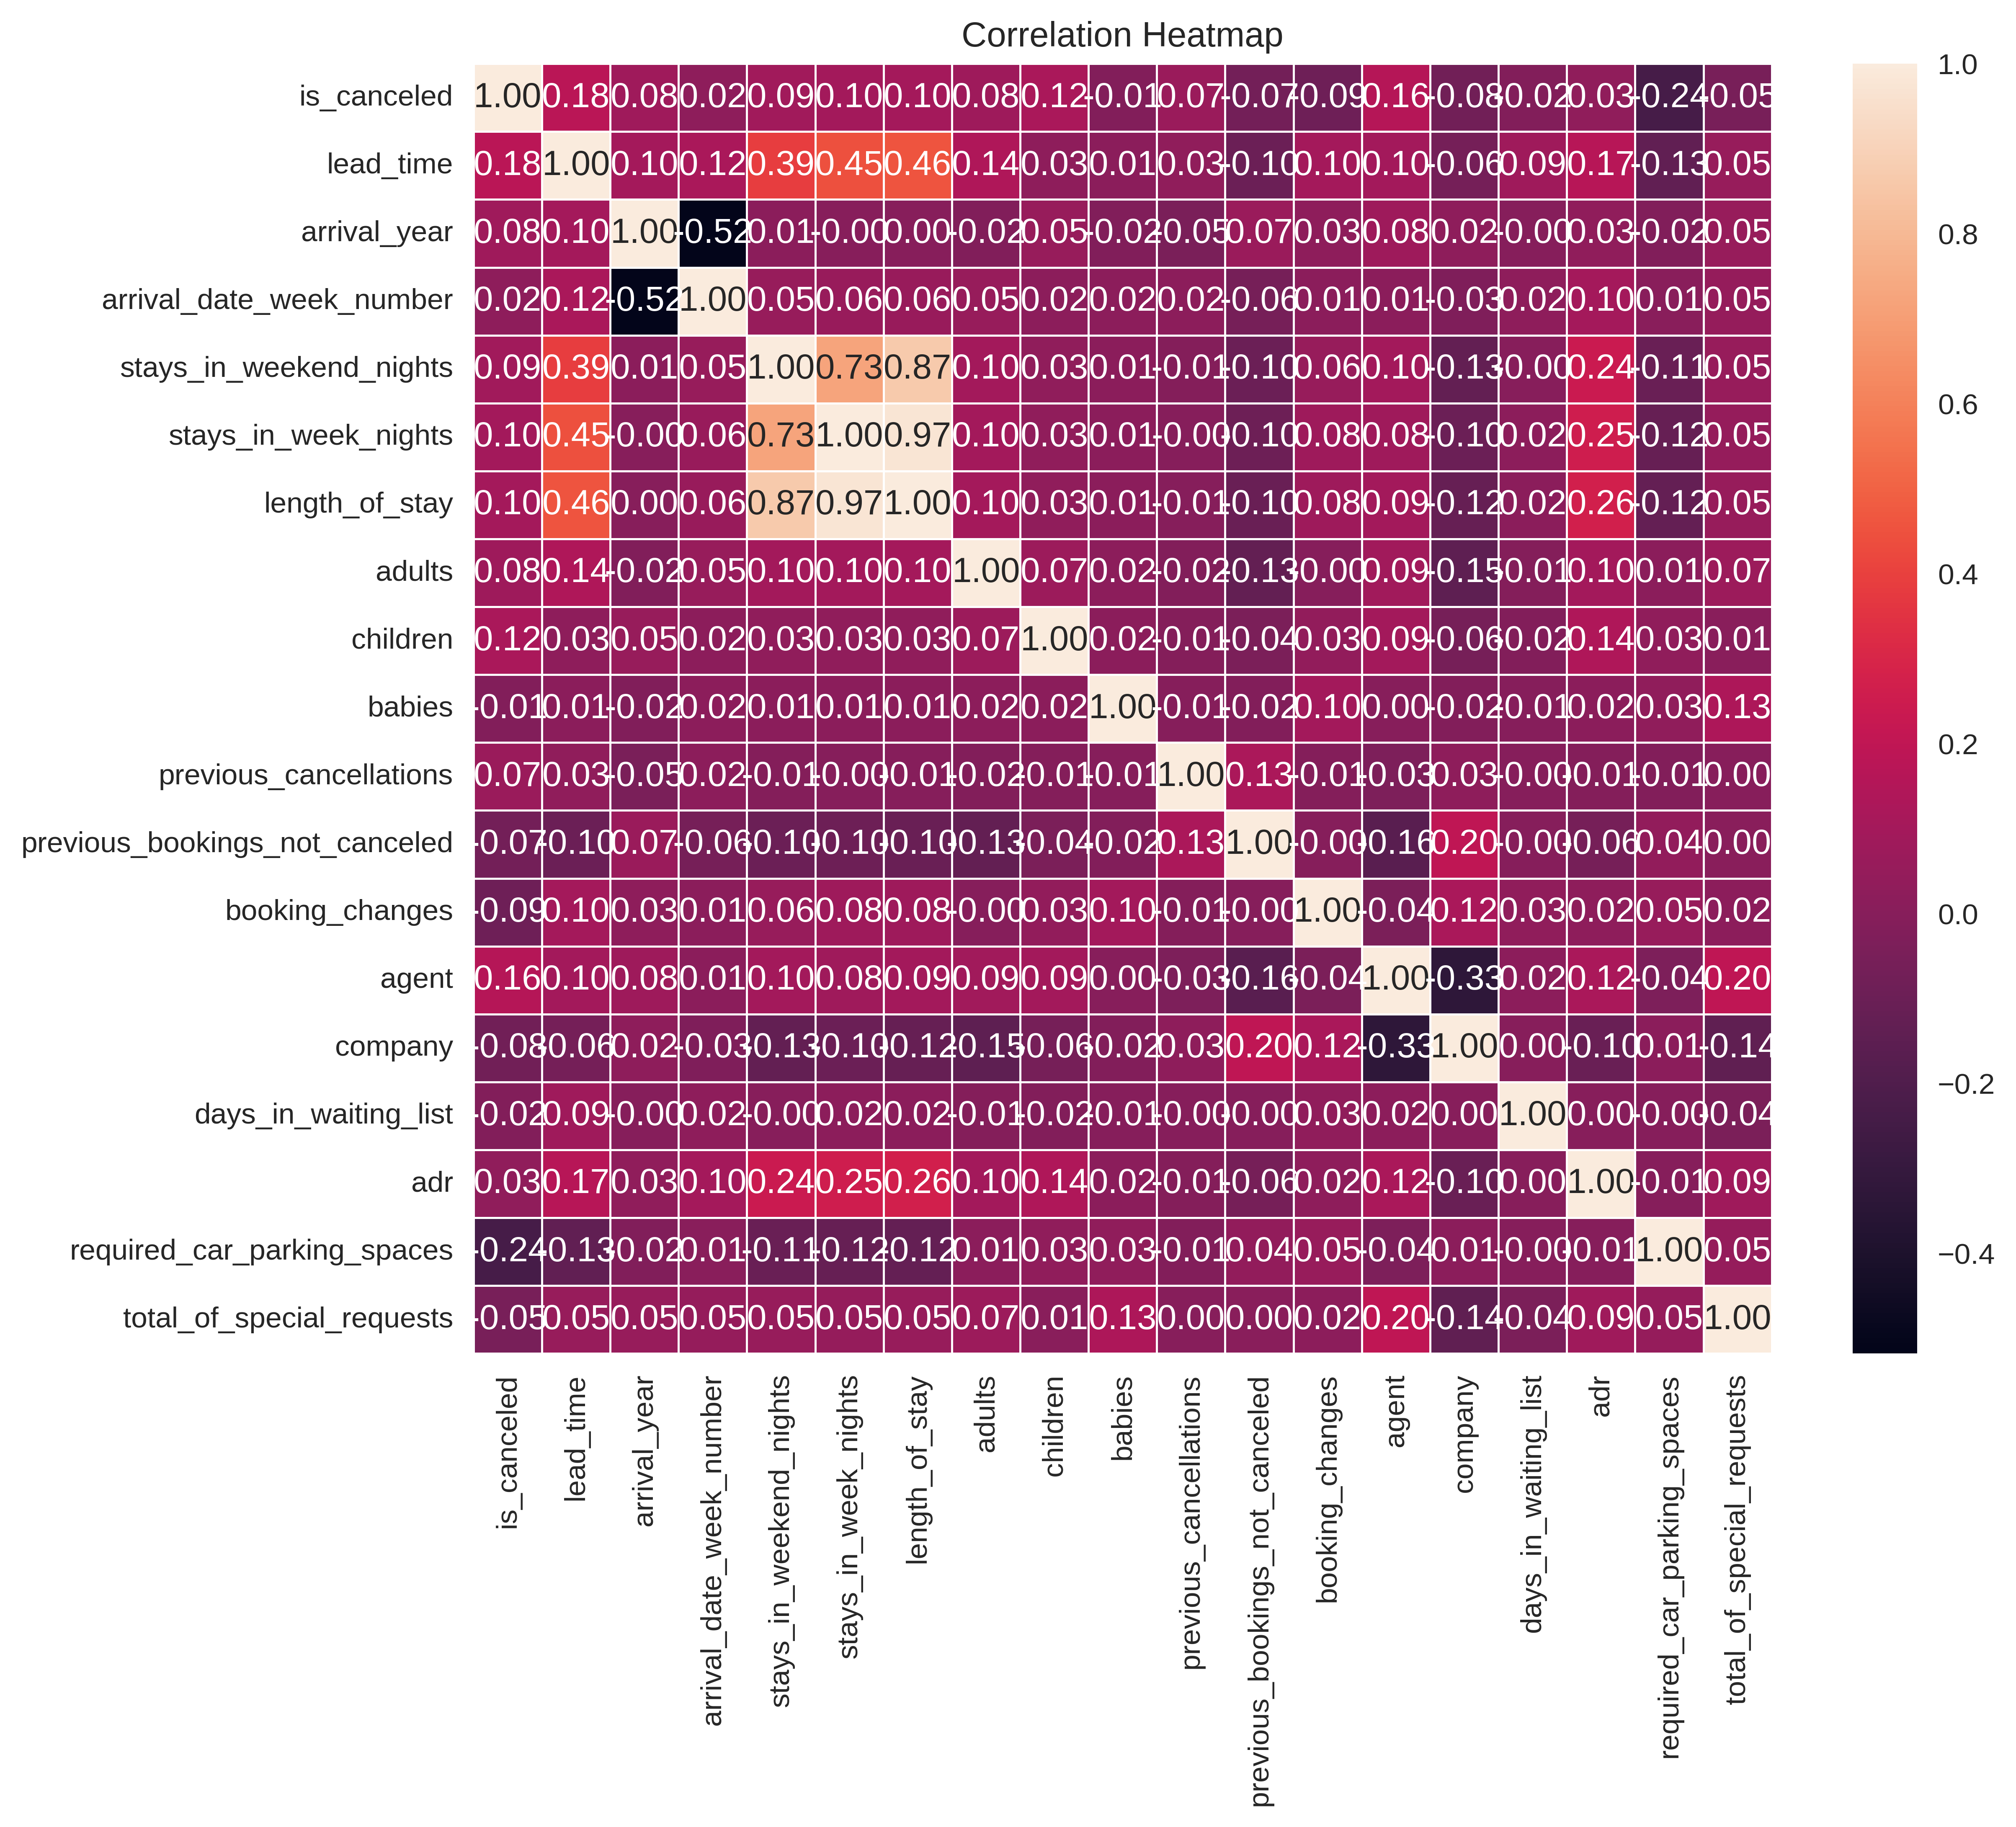

In [ ]:
#plt.figure(figsize=(10, 8))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
#plt.title('Correlation Heatmap')
#plt.show()


plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(correlation_matrix,annot=True,fmt=".2f", linewidth=.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#correaltions between age and sex columns
#c = np.corrcoef(df['age'],df['sex'])
#print('Correlations between age and sex\n',c)

#Correlation between is_canceled and lead time
c = np.corrcoef(Resort_CAdrop['is_canceled'],Resort_CAdrop['lead_time'])
print('Correlations between is_canceled and lead_time\n',c)

Correlations between is_canceled and lead_time
 [[1.         0.18175302]
 [0.18175302 1.        ]]


# **Modelling - Logistic Regression**

**Set Variable: to keep or to drop

In [ ]:
## Create correlation matrix
#corr_matrix = sep_users_feat.corr().abs()

## Select upper triangle of correlation matrix
#upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

## Find features with correlation greater than 0.7, and add into to_drop list
#to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
#to_drop

# Create correlation matrix
Correlation_matrix = Resort_CAdrop.corr().abs()

# Select upper triangle of correlation matrix
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))

# Find features with the correlation greater than 0.65
to_drop = [column for column in upper.columns if any(upper[column] > 0.65)]
to_drop

<ipython-input-57-77ce72ea1fb4>:12: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-57-77ce72ea1fb4>:15: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



['stays_in_week_nights', 'length_of_stay']

In [ ]:
corr_column = Resort_CAdrop.select_dtypes(include=[np.number]).columns.to_list()

In [ ]:
to_keep = list(set(corr_column) - set(to_drop))
to_keep

['previous_cancellations',
 'previous_bookings_not_canceled',
 'stays_in_weekend_nights',
 'required_car_parking_spaces',
 'is_canceled',
 'lead_time',
 'booking_changes',
 'arrival_date_week_number',
 'total_of_special_requests',
 'agent',
 'company',
 'arrival_year',
 'adults',
 'adr',
 'days_in_waiting_list',
 'babies',
 'children']

In [ ]:
len(to_keep)

17

**Import libraries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
## Define the data
# X = sep_users_feat[to_keep]
# y = sep_users_trgt['flag_order_bond']

## Split into training and test dataset
# X_training, X_test, y_training, y_test = train_test_split(X,y,test_size = 0.3,random_state=42)

# Define the data
X = Resort_CAdrop[to_keep]
y = Resort_CAdrop['is_canceled']

# Split into training and test dataset
X_training, X_test, y_training, y_test = train_test_split(X,y,test_size = 0.3,random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_training, y_training)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 0.99
Confusion Matrix:
[[7620    0]
 [  71 2362]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7620
           1       1.00      0.97      0.99      2433

    accuracy                           0.99     10053
   macro avg       1.00      0.99      0.99     10053
weighted avg       0.99      0.99      0.99     10053



**Alternative**

In [ ]:
for df in [X_training, X_test, y_training, y_test]:
    df = df.values.reshape(-1, 1)

In [ ]:
print(df.shape)

(10053, 1)


In [ ]:
# Check class balance in each datasets
for df in [y_training,y_test]:
  df2 = df.value_counts()
  print(df2)

0    17943
1     5513
Name: is_canceled, dtype: int64
0    7620
1    2433
Name: is_canceled, dtype: int64


In [ ]:
# Fit the Logistic regression model
model = LogisticRegression(class_weight='balanced',max_iter=500)
model.fit(X_training, y_training)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(class_weight='balanced', max_iter=500)

In [ ]:
model.score(X_training, y_training)

1.0

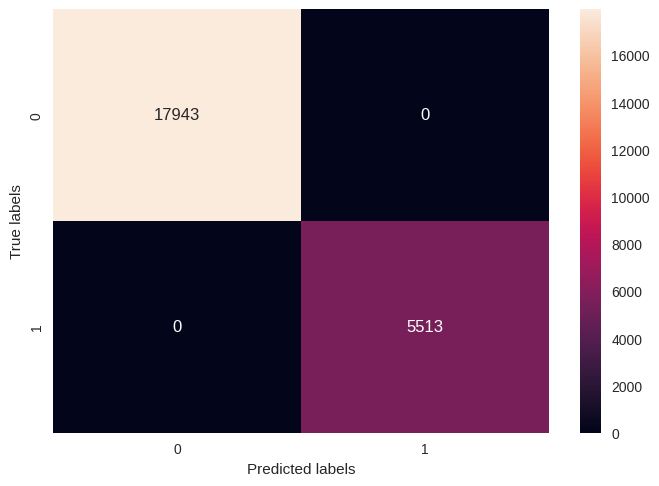

In [ ]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_training, model.predict(X_training)), annot=True, fmt = 'd')
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');

In [ ]:
model.score(X_test,y_test)

1.0

# **Inspect Model Coeeficient**

In [ ]:
model_coef = {}
for i in range(len(to_keep)):
  model_coef[to_keep[i]] = model.coef_[0][i]

pd.DataFrame.from_dict(model_coef, orient='index').sort_values(by=[0])

,0
required_car_parking_spaces,-2.271811
previous_bookings_not_canceled,-0.247420
booking_changes,-0.085109
babies,-0.016317
arrival_date_week_number,-0.007087
arrival_year,-0.003948
days_in_waiting_list,-0.003155
adr,-0.000016
agent,0.001078
lead_time,0.001647


# **Clustering**

In [ ]:
Resort = RH.copy()

In [ ]:
Resort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39582 entries, 0 to 39592
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           39582 non-null  object        
 1   is_canceled                     39582 non-null  int64         
 2   lead_time                       39582 non-null  int64         
 3   arrival_date                    39582 non-null  datetime64[ns]
 4   arrival_date_day                39582 non-null  int64         
 5   arrival_month                   39582 non-null  object        
 6   arrival_year                    39582 non-null  int64         
 7   arrival_month_year              39582 non-null  object        
 8   arrival_date_week_number        39582 non-null  int64         
 9   stays_in_weekend_nights         39582 non-null  int64         
 10  stays_in_week_nights            39582 non-null  int64         
 11  le

In [ ]:
Resort['RowNumber'] = range(1, len(Resort)+1)
print(Resort)

              hotel  is_canceled  lead_time arrival_date  arrival_date_day  \
0      Resort Hotel            0        342   2015-07-01                 1   
1      Resort Hotel            0        737   2015-07-01                 1   
2      Resort Hotel            0          7   2015-07-01                 1   
3      Resort Hotel            0         13   2015-07-01                 1   
4      Resort Hotel            0         14   2015-07-01                 1   
...             ...          ...        ...          ...               ...   
39588  Resort Hotel            0        212   2017-08-31                31   
39589  Resort Hotel            0        169   2017-08-30                30   
39590  Resort Hotel            0        204   2017-08-29                29   
39591  Resort Hotel            0        211   2017-08-31                31   
39592  Resort Hotel            0        161   2017-08-31                31   

      arrival_month  arrival_year arrival_month_year  \
0      

In [ ]:
Resort

,hotel,is_canceled,lead_time,arrival_date,arrival_date_day,arrival_month,arrival_year,arrival_month_year,arrival_date_week_number,stays_in_weekend_nights,...,is_use_agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,RowNumber
0,Resort Hotel,0,342,2015-07-01,1,July,2015,July-2015,27,0,...,0,0,0,Transient,0,0,0,Check-Out,2015-07-01,1
1,Resort Hotel,0,737,2015-07-01,1,July,2015,July-2015,27,0,...,0,0,0,Transient,0,0,0,Check-Out,2015-07-01,2
2,Resort Hotel,0,7,2015-07-01,1,July,2015,July-2015,27,0,...,0,0,0,Transient,75,0,0,Check-Out,2015-07-02,3
3,Resort Hotel,0,13,2015-07-01,1,July,2015,July-2015,27,0,...,1,0,0,Transient,75,0,0,Check-Out,2015-07-02,4
4,Resort Hotel,0,14,2015-07-01,1,July,2015,July-2015,27,0,...,1,0,0,Transient,98,0,1,Check-Out,2015-07-03,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39588,Resort Hotel,0,212,2017-08-31,31,August,2017,August-2017,35,2,...,1,0,0,Transient,8975,0,0,Check-Out,2017-09-10,39578
39589,Resort Hotel,0,169,2017-08-30,30,August,2017,August-2017,35,2,...,1,0,0,Transient-Party,20227,0,1,Check-Out,2017-09-10,39579
39590,Resort Hotel,0,204,2017-08-29,29,August,2017,August-2017,35,4,...,1,0,0,Transient,15357,0,3,Check-Out,2017-09-12,39580
39591,Resort Hotel,0,211,2017-08-31,31,August,2017,August-2017,35,4,...,1,0,0,Contract,1128,0,1,Check-Out,2017-09-14,39581


In [ ]:
Resort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39582 entries, 0 to 39592
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           39582 non-null  object        
 1   is_canceled                     39582 non-null  int64         
 2   lead_time                       39582 non-null  int64         
 3   arrival_date                    39582 non-null  datetime64[ns]
 4   arrival_date_day                39582 non-null  int64         
 5   arrival_month                   39582 non-null  object        
 6   arrival_year                    39582 non-null  int64         
 7   arrival_month_year              39582 non-null  object        
 8   arrival_date_week_number        39582 non-null  int64         
 9   stays_in_weekend_nights         39582 non-null  int64         
 10  stays_in_week_nights            39582 non-null  int64         
 11  le

In [ ]:
Resort['RowNumber'] = Resort['RowNumber'].astype(str)

## **Dropping columns**

In [ ]:
Resort_ = Resort.copy()

In [ ]:
Resort_drop = Resort_.drop(['hotel', 'arrival_date', 'arrival_month', 'arrival_year', 'arrival_month_year','assigned_room_type','is_room_change','agent','total_of_special_requests',
                       'reservation_status_date', 'country', 'subregion', 'reserved_room_type', 'continent', 'meal', 'arrival_date_day', 'previous_cancellations', 'previous_bookings_not_canceled',
                       'days_in_waiting_list', 'booking_changes', 'company', 'adr', 'stays_in_weekend_nights','stays_in_week_nights', 'required_car_parking_spaces', 'adults', 'children',
                       'babies', 'lead_time'],axis=1)

In [ ]:
Resort_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39582 entries, 0 to 39592
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   is_canceled               39582 non-null  int64 
 1   arrival_date_week_number  39582 non-null  int64 
 2   length_of_stay            39582 non-null  int64 
 3   market_segment            39582 non-null  object
 4   distribution_channel      39582 non-null  object
 5   is_repeated_guest         39582 non-null  object
 6   deposit_type              39582 non-null  object
 7   is_use_agent              39582 non-null  object
 8   customer_type             39582 non-null  object
 9   reservation_status        39582 non-null  object
 10  RowNumber                 39582 non-null  object
dtypes: int64(3), object(8)
memory usage: 3.6+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

for cat_var in ['is_canceled', 'is_repeated_guest', 'is_use_agent']:
  Resort_drop[cat_var] = le.fit_transform(Resort_drop[cat_var])

Resort_drop

,is_canceled,arrival_date_week_number,length_of_stay,market_segment,distribution_channel,is_repeated_guest,deposit_type,is_use_agent,customer_type,reservation_status,RowNumber
0,0,27,0,Direct,Direct,0,No Deposit,0,Transient,Check-Out,1
1,0,27,0,Direct,Direct,0,No Deposit,0,Transient,Check-Out,2
2,0,27,1,Direct,Direct,0,No Deposit,0,Transient,Check-Out,3
3,0,27,1,Corporate,Corporate,0,No Deposit,1,Transient,Check-Out,4
4,0,27,2,Online TA,TA/TO,0,No Deposit,1,Transient,Check-Out,5
...,...,...,...,...,...,...,...,...,...,...,...
39588,0,35,10,Offline TA/TO,TA/TO,0,No Deposit,1,Transient,Check-Out,39578
39589,0,35,11,Direct,Direct,0,No Deposit,1,Transient-Party,Check-Out,39579
39590,0,35,14,Direct,Direct,0,No Deposit,1,Transient,Check-Out,39580
39591,0,35,14,Offline TA/TO,TA/TO,0,No Deposit,1,Contract,Check-Out,39581


## **One Hot Encoding**

In [ ]:
Resort_drop = pd.get_dummies(Resort_drop, columns=['market_segment', 'distribution_channel', 'deposit_type','customer_type', 'reservation_status'])
Resort_drop

,is_canceled,arrival_date_week_number,length_of_stay,is_repeated_guest,is_use_agent,RowNumber,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,...,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
0,0,27,0,0,0,1,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
1,0,27,0,0,0,2,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0,27,1,0,0,3,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
3,0,27,1,0,1,4,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
4,0,27,2,0,1,5,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39588,0,35,10,0,1,39578,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
39589,0,35,11,0,1,39579,0,0,1,0,...,1,0,0,0,0,0,1,0,1,0
39590,0,35,14,0,1,39580,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
39591,0,35,14,0,1,39581,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [ ]:
Resort_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39582 entries, 0 to 39592
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   is_canceled                     39582 non-null  int64 
 1   arrival_date_week_number        39582 non-null  int64 
 2   length_of_stay                  39582 non-null  int64 
 3   is_repeated_guest               39582 non-null  int64 
 4   is_use_agent                    39582 non-null  int64 
 5   RowNumber                       39582 non-null  object
 6   market_segment_Complementary    39582 non-null  uint8 
 7   market_segment_Corporate        39582 non-null  uint8 
 8   market_segment_Direct           39582 non-null  uint8 
 9   market_segment_Groups           39582 non-null  uint8 
 10  market_segment_Offline TA/TO    39582 non-null  uint8 
 11  market_segment_Online TA        39582 non-null  uint8 
 12  distribution_channel_Corporate  39582 non-null

## **Scaler**

In [ ]:
scaler = MinMaxScaler()
std_data = Resort_drop.set_index('RowNumber')
std_data[:] = scaler.fit_transform(std_data[:])
std_data

<ipython-input-87-43b1993d87b3>:3: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



,is_canceled,arrival_date_week_number,length_of_stay,is_repeated_guest,is_use_agent,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,...,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
RowNumber,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.500000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.500000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.500000,0.017857,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.500000,0.017857,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,0.0,0.500000,0.035714,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39578,0.0,0.653846,0.178571,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
39579,0.0,0.653846,0.196429,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
39580,0.0,0.653846,0.250000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## **K-Means**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from datetime import datetime
from sklearn import cluster
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



1 99433.6859727762


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



2 74498.61927483902


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



3 56954.2595073211


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



4 48033.59781583463


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



5 40252.878798222184


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



6 35167.06036044199


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



7 30214.08696887347


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



8 28269.382551912324


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



9 25629.531666835646


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



10 23158.183109934485


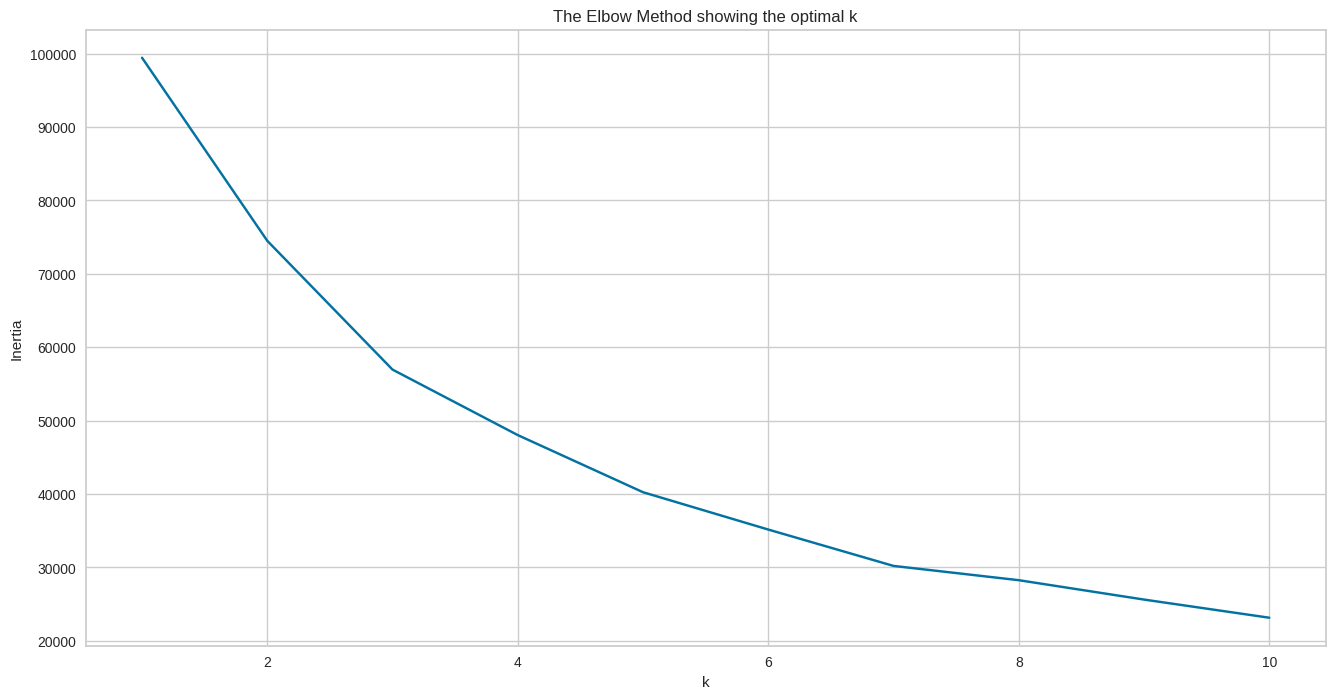

In [ ]:
distortions = []
K = range(1,11)
for k in K:
  kmeanModel = cluster.KMeans(n_clusters=k)
  kmeanModel.fit(std_data)
  distortions.append(kmeanModel.inertia_)
  print(k, kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## **Validation by Silhouette**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For k=2, the average silhouette score is 0.3196447392192426


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For k=3, the average silhouette score is 0.37282172071674996


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For k=4, the average silhouette score is 0.38195940093521696


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For k=5, the average silhouette score is 0.43878959781092036


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For k=6, the average silhouette score is 0.467180159662197


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For k=7, the average silhouette score is 0.5028753886819459


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For k=8, the average silhouette score is 0.5190083408941971


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For k=9, the average silhouette score is 0.5313907340826466


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For k=10, the average silhouette score is 0.5574857732603622


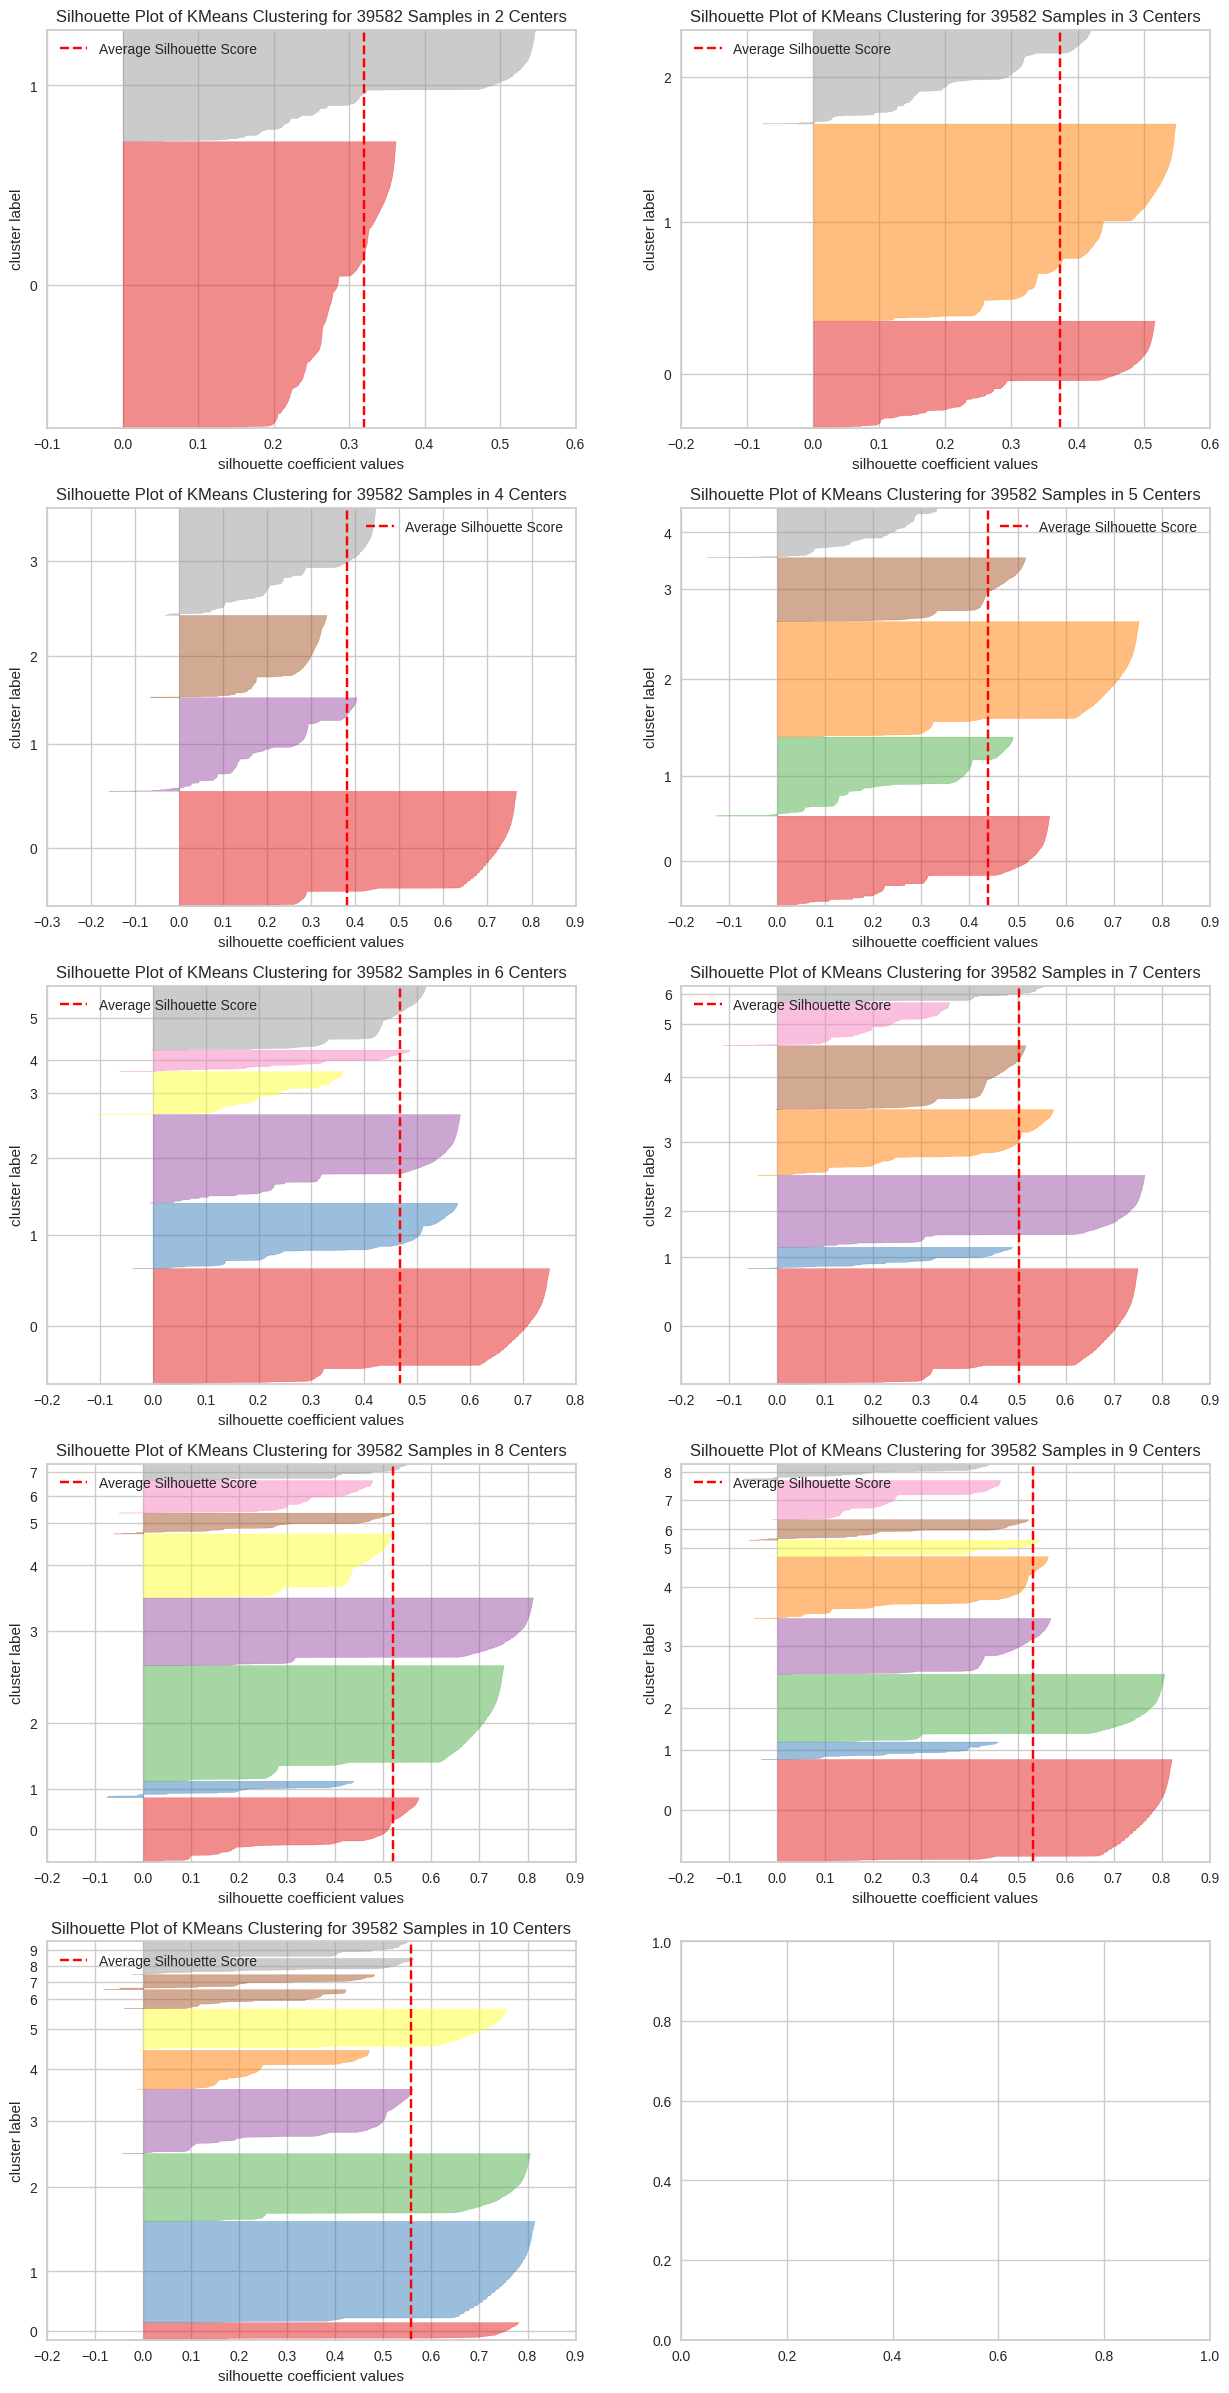

In [ ]:
# Silhouette score plot
K = range(2,11)
max_K = max(K)
fig, ax = plt.subplots(int(np.ceil(max_K/2)), 2, figsize = (15,30))

for n_clusters in K:
  kmeanModel = cluster.KMeans(n_clusters)

  q, mod = divmod(n_clusters,2)
  sil = SilhouetteVisualizer(kmeanModel, is_fitted = False, ax = ax[q-1][mod])
  sil.fit(std_data)
  sil.finalize()
  print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")

In [ ]:
cluster_model = cluster.KMeans(n_clusters=3)
cluster_model.fit(std_data)
cluster_label = cluster_model.labels_
std_data['cluster'] = cluster_label
df_result = std_data.reset_index()[['RowNumber','cluster']]
df_result

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,RowNumber,cluster
0,1,2
1,2,2
2,3,2
3,4,2
4,5,0
...,...,...
39577,39578,0
39578,39579,2
39579,39580,2
39580,39581,0


## **Merged Clustering Data and Original Data**

In [ ]:
df_result = pd.merge(Resort_, df_result, on=['RowNumber'])
df_result

,hotel,is_canceled,lead_time,arrival_date,arrival_date_day,arrival_month,arrival_year,arrival_month_year,arrival_date_week_number,stays_in_weekend_nights,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,RowNumber,cluster
0,Resort Hotel,0,342,2015-07-01,1,July,2015,July-2015,27,0,...,0,0,Transient,0,0,0,Check-Out,2015-07-01,1,2
1,Resort Hotel,0,737,2015-07-01,1,July,2015,July-2015,27,0,...,0,0,Transient,0,0,0,Check-Out,2015-07-01,2,2
2,Resort Hotel,0,7,2015-07-01,1,July,2015,July-2015,27,0,...,0,0,Transient,75,0,0,Check-Out,2015-07-02,3,2
3,Resort Hotel,0,13,2015-07-01,1,July,2015,July-2015,27,0,...,0,0,Transient,75,0,0,Check-Out,2015-07-02,4,2
4,Resort Hotel,0,14,2015-07-01,1,July,2015,July-2015,27,0,...,0,0,Transient,98,0,1,Check-Out,2015-07-03,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39577,Resort Hotel,0,212,2017-08-31,31,August,2017,August-2017,35,2,...,0,0,Transient,8975,0,0,Check-Out,2017-09-10,39578,0
39578,Resort Hotel,0,169,2017-08-30,30,August,2017,August-2017,35,2,...,0,0,Transient-Party,20227,0,1,Check-Out,2017-09-10,39579,2
39579,Resort Hotel,0,204,2017-08-29,29,August,2017,August-2017,35,4,...,0,0,Transient,15357,0,3,Check-Out,2017-09-12,39580,2
39580,Resort Hotel,0,211,2017-08-31,31,August,2017,August-2017,35,4,...,0,0,Contract,1128,0,1,Check-Out,2017-09-14,39581,0


In [ ]:
df_result.groupby(['cluster'])[['RowNumber']].count()

,RowNumber
cluster,
0,19599
1,10668
2,9315


In [ ]:
Resort_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39582 entries, 0 to 39592
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           39582 non-null  object        
 1   is_canceled                     39582 non-null  int64         
 2   lead_time                       39582 non-null  int64         
 3   arrival_date                    39582 non-null  datetime64[ns]
 4   arrival_date_day                39582 non-null  int64         
 5   arrival_month                   39582 non-null  object        
 6   arrival_year                    39582 non-null  int64         
 7   arrival_month_year              39582 non-null  object        
 8   arrival_date_week_number        39582 non-null  int64         
 9   stays_in_weekend_nights         39582 non-null  int64         
 10  stays_in_week_nights            39582 non-null  int64         
 11  le

## **Define Column**

In [ ]:
categorical_col = ['is_canceled', 'is_use_agent', 'previous_cancellations', 'previous_bookings_not_canceled', 'country', 'continent', 'subregion', 'company', 'meal','market_segment', 'distribution_channel', 'deposit_type', 'customer_type', 'reservation_status', 'arrival_month']
invested_col = ['adr', 'lead_time', 'length_of_stay', 'days_in_waiting_list']
frequency_col = ['adults', 'children', 'babies']

## **Profiling Cluseter**

In [ ]:
df_cluster_0 = df_result[df_result['cluster'] == 0]

for col in categorical_col:
  print('Value counts on',col,'collumn:')
  print(df_cluster_0[col].value_counts(normalize=True))
  print('\n')

df_invested = df_cluster_0[invested_col].agg(['mean'])
df_frequency = df_cluster_0[frequency_col].agg(['min','max'])

print(df_frequency)
df_invested

Value counts on is_canceled collumn:
0    1.0
Name: is_canceled, dtype: float64


Value counts on is_use_agent collumn:
1    0.974795
0    0.025205
Name: is_use_agent, dtype: float64


Value counts on previous_cancellations collumn:
0    0.999643
1    0.000255
2    0.000102
Name: previous_cancellations, dtype: float64


Value counts on previous_bookings_not_canceled collumn:
0     0.974744
1     0.015358
2     0.004235
3     0.002245
4     0.001327
5     0.001020
6     0.000510
7     0.000153
9     0.000102
8     0.000102
10    0.000051
11    0.000051
12    0.000051
13    0.000051
Name: previous_bookings_not_canceled, dtype: float64


Value counts on country collumn:
PRT    0.255931
GBR    0.239859
ESP    0.126435
IRL    0.071687
FRA    0.056125
         ...   
ZMB    0.000051
UGA    0.000051
COM    0.000051
MUS    0.000051
LBN    0.000051
Name: country, Length: 112, dtype: float64


Value counts on continent collumn:
Europe       0.911883
Asia         0.047043
America      0.033726
Af

,adr,lead_time,length_of_stay,days_in_waiting_list
mean,2666.914996,89.752742,4.605643,0.530384


In [ ]:
df_cluster_1 = df_result[df_result['cluster'] == 1]

for col in categorical_col:
  print('Value counts on',col,'collumn:')
  print(df_cluster_1[col].value_counts(normalize=True))
  print('\n')

df_invested = df_cluster_1[invested_col].agg(['mean'])
df_frequency = df_cluster_1[frequency_col].agg(['min','max'])

print(df_frequency)
df_invested

Value counts on is_canceled collumn:
1    1.0
Name: is_canceled, dtype: float64


Value counts on is_use_agent collumn:
1    0.904668
0    0.095332
Name: is_use_agent, dtype: float64


Value counts on previous_cancellations collumn:
0     0.918635
1     0.065711
24    0.004499
26    0.002437
25    0.002343
2     0.001875
19    0.001781
14    0.001312
3     0.001031
4     0.000281
5     0.000094
Name: previous_cancellations, dtype: float64


Value counts on previous_bookings_not_canceled collumn:
0     0.995969
1     0.001781
2     0.000844
3     0.000375
8     0.000187
13    0.000187
27    0.000094
14    0.000094
10    0.000094
11    0.000094
7     0.000094
5     0.000094
4     0.000094
Name: previous_bookings_not_canceled, dtype: float64


Value counts on country collumn:
PRT    0.660292
GBR    0.083146
ESP    0.079584
IRL    0.040401
FRA    0.019685
         ...   
KAZ    0.000094
GGY    0.000094
VEN    0.000094
KWT    0.000094
BHR    0.000094
Name: country, Length: 71, dtype: float6

,adr,lead_time,length_of_stay,days_in_waiting_list
mean,2340.247094,131.893888,4.829959,0.096644


In [ ]:
df_cluster_2 = df_result[df_result['cluster'] == 2]

for col in categorical_col:
  print('Value counts on',col,'collumn:')
  print(df_cluster_2[col].value_counts(normalize=True))
  print('\n')

df_invested = df_cluster_2[invested_col].agg(['mean'])
df_frequency = df_cluster_2[frequency_col].agg(['min','max'])

print(df_frequency)
df_invested

Value counts on is_canceled collumn:
0    0.956092
1    0.043908
Name: is_canceled, dtype: float64


Value counts on is_use_agent collumn:
0    0.683199
1    0.316801
Name: is_use_agent, dtype: float64


Value counts on previous_cancellations collumn:
0    0.980354
1    0.016747
2    0.002040
3    0.000322
4    0.000322
5    0.000215
Name: previous_cancellations, dtype: float64


Value counts on previous_bookings_not_canceled collumn:
0     0.863661
1     0.060440
2     0.026946
3     0.013312
4     0.008588
5     0.006334
6     0.004509
7     0.003113
8     0.002791
9     0.002040
10    0.001718
12    0.001181
11    0.001074
13    0.000751
14    0.000751
15    0.000429
25    0.000322
16    0.000322
21    0.000215
24    0.000215
17    0.000215
18    0.000215
27    0.000107
28    0.000107
30    0.000107
19    0.000107
20    0.000107
22    0.000107
23    0.000107
26    0.000107
Name: previous_bookings_not_canceled, dtype: float64


Value counts on country collumn:
PRT    0.596994
GBR    

,adr,lead_time,length_of_stay,days_in_waiting_list
mean,1619.889211,57.206119,3.209018,1.016855


In [ ]:
df_result.to_csv('Resort_result230823.csv', index=False)